In [6]:
import pandas as pd
import numpy as np

data=pd.read_csv("Sales.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_44340\3590514762.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales['Total cost'].resample('M').sum()


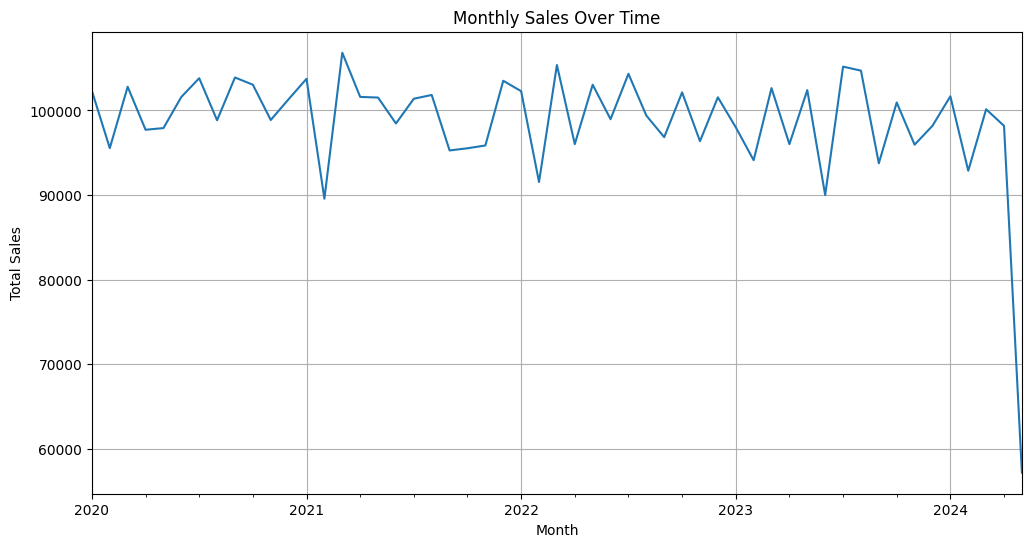

In [7]:
# Convert order_date to datetime and set as index
sales = data.copy()
sales['order_date'] = pd.to_datetime(sales['order_date'], dayfirst=True, errors='coerce')
sales = sales.dropna(subset=['order_date'])
sales = sales.set_index('order_date')

# Resample to monthly sales totals
monthly_sales = sales['Total cost'].resample('M').sum()

# Plot the time series
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


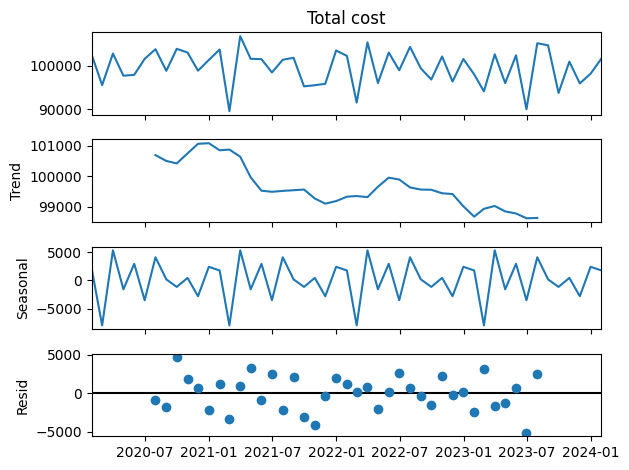

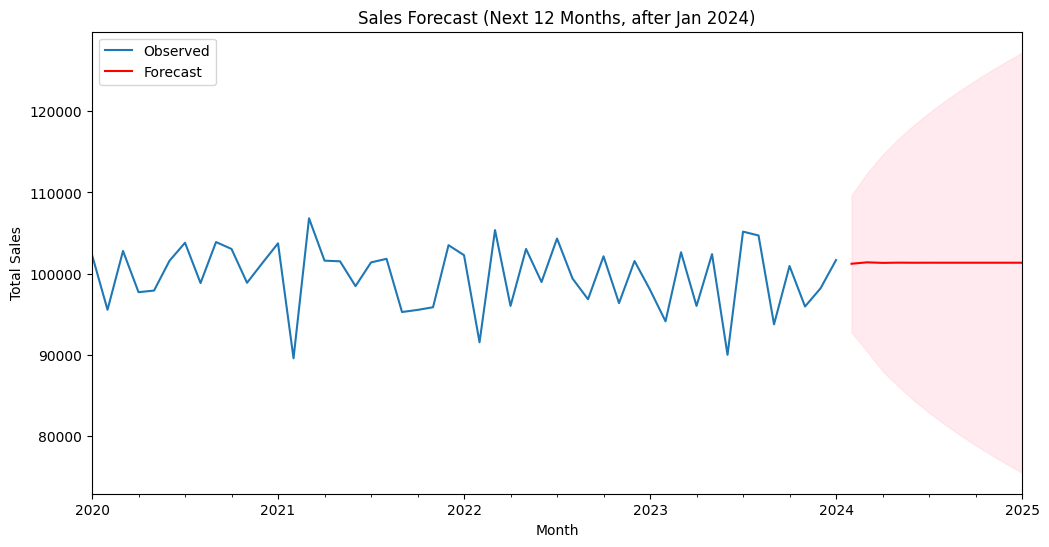

In [8]:
# Remove data after Jan 2024, then forecast
cutoff = pd.Timestamp('2024-01-31')
monthly_sales_cut = monthly_sales[monthly_sales.index <= cutoff]

# Simple decomposition (trend/seasonality)
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(monthly_sales_cut, model='additive')
result.plot()
plt.show()

# Forecasting with ARIMA on truncated data
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(monthly_sales_cut, order=(1,1,1))
model_fit = model.fit()
pred = model_fit.get_forecast(steps=12)
pred_ci = pred.conf_int()

plt.figure(figsize=(12,6))
monthly_sales_cut.plot(label='Observed')
pred.predicted_mean.plot(label='Forecast', color='red')
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title('Sales Forecast (Next 12 Months, after Jan 2024)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()